In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [44]:
file_name = "testset.csv"
save_file = "train_proc_med.csv"

In [45]:
df = pd.read_csv(file_name)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [46]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [47]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [48]:
df.columns = map(lambda x: x.strip(), df.columns)
df.columns = map(lambda x: x.strip('_'), df.columns)
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [49]:
df.conds.unique()

array(['Smoke', 'Clear', 'Haze', 'Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 'Rain',
       'Light Rain', 'Light Drizzle', 'Drizzle', 'Mist', 'Volcanic Ash',
       'Thunderstorm', 'Light Thunderstorms and Rain',
       'Light Thunderstorm', 'Squalls', 'Heavy Rain', 'Light Haze',
       'Sandstorm', 'Widespread Dust', 'Funnel Cloud',
       'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms with Hail',
       'Light Rain Showers', 'Thunderstorms with Hail', nan,
       'Partial Fog', 'Light Fog', 'Heavy Fog', 'Blowing Sand',
       'Light Hail Showers', 'Light Sandstorm', 'Light Freezing Rain',
       'Rain Showers'], dtype=object)

In [50]:
df.conds.value_counts(ascending=False)

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [51]:
df.wdire.unique()

array(['West', 'North', 'SSW', 'WSW', 'NNE', 'SW', 'WNW', 'NW', 'SSE',
       'East', 'ENE', 'ESE', 'SE', 'NE', 'NNW', 'South', 'Variable', nan],
      dtype=object)

In [52]:
df.wdire.value_counts(ascending=False)

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: wdire, dtype: int64

In [53]:
def getyear(val):
    return val[0:4]

def getmonth(val):
    return val[4:6]

df["year"] = df["datetime_utc"].apply(lambda val:getyear(val))
df["month"] = df["datetime_utc"].apply(lambda val:getmonth(val))

df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,...,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11


In [54]:
df.describe()

,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [55]:
df.groupby("year").tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: tempm, dtype: float64

In [56]:
temp_mean_yearly = df.groupby("year").tempm.mean().reset_index().sort_values('year', ascending=True)
temp_mean_yearly.head(5)

,year,tempm
0,1996,16.518636
1,1997,24.444635
2,1998,24.847371
3,1999,27.335731
4,2000,23.865647


In [57]:
temp_mean_yearly.dtypes

year      object
tempm    float64
dtype: object

In [58]:
temp_mean_yearly.year = temp_mean_yearly.year.astype("int")
temp_mean_yearly.dtypes

year       int32
tempm    float64
dtype: object

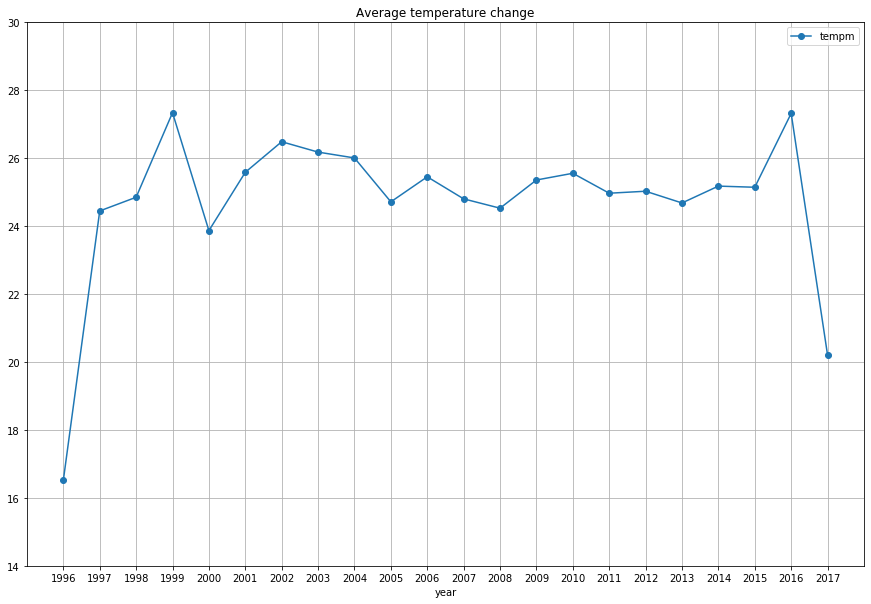

In [59]:

temp_mean_yearly.plot(kind="line", x="year", y="tempm", figsize=(15, 10),marker="o")
plt.axis([1995,2018,14,30])
plt.grid(True)
plt.xticks(temp_mean_yearly.year)
plt.title("Average temperature change")
plt.plot();

[]

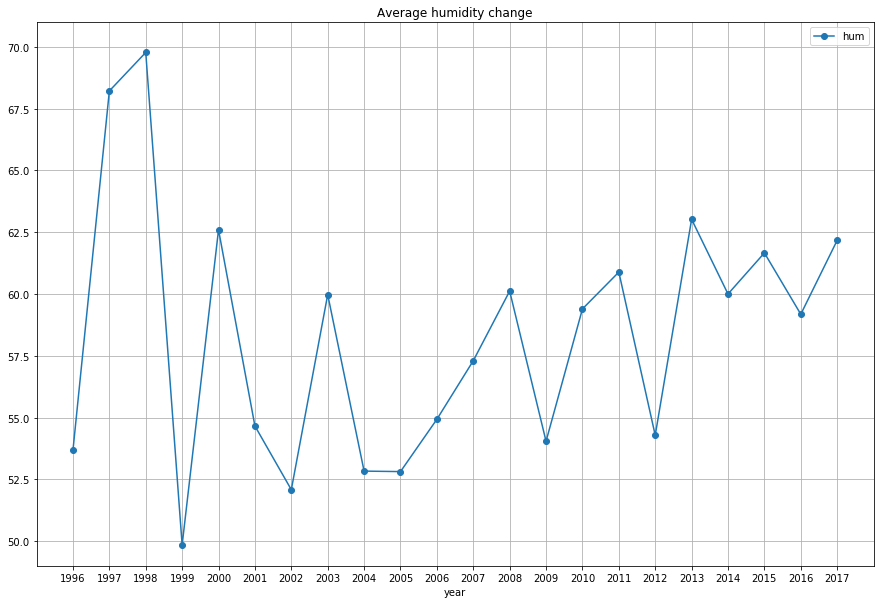

In [71]:
hum_mean_yearly = df.groupby("year").hum.mean().reset_index().sort_values('year', ascending=True)
#hum_mean_yearly.head(5)
hum_mean_yearly.year = hum_mean_yearly.year.astype("int")
hum_mean_yearly.plot(kind="line", x="year", y="hum", figsize=(15, 10),marker="o")
#plt.axis([1995,2018,14,30])
plt.grid(True)
plt.axis([1995,2018,49,71])
plt.xticks(hum_mean_yearly.year)
plt.title("Average humidity change")
plt.plot()

[]

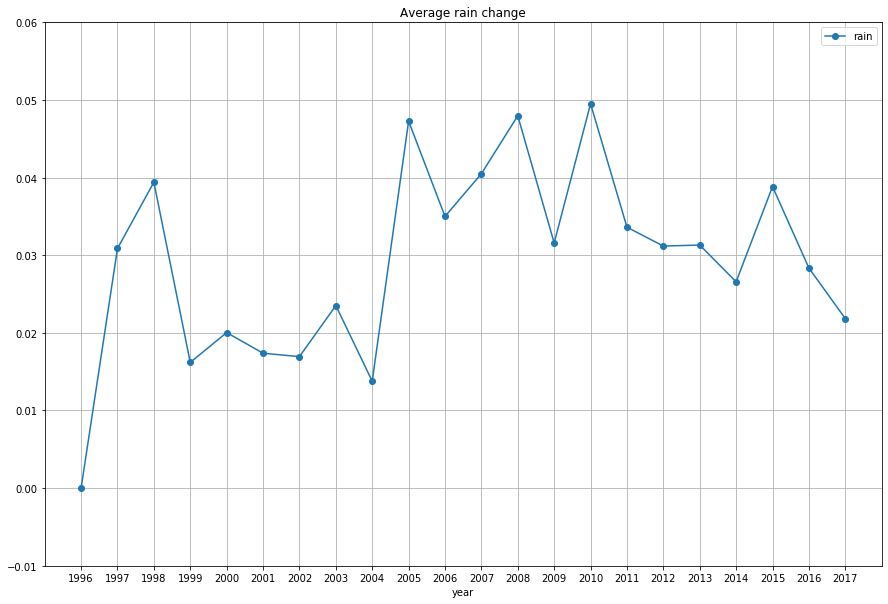

In [72]:
rain_mean_yearly = df.groupby("year").rain.mean().reset_index().sort_values('year', ascending=True)
rain_mean_yearly.year = rain_mean_yearly.year.astype("int")
rain_mean_yearly.plot(kind="line", x="year", y="rain", figsize=(15, 10),marker="o")
plt.grid(True)
plt.axis([1995,2018,-0.01,0.06])
plt.xticks(rain_mean_yearly.year)
plt.title("Average rain change")
plt.plot()

[]

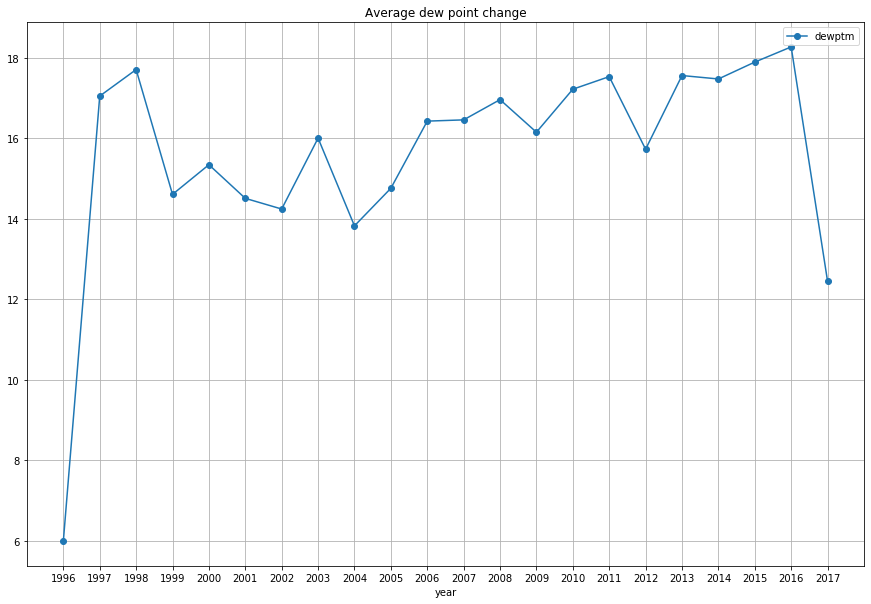

In [74]:
dew_mean_yearly = df.groupby("year").dewptm.mean().reset_index().sort_values('year', ascending=True)
dew_mean_yearly.year = dew_mean_yearly.year.astype("int")
dew_mean_yearly.plot(kind="line", x="year", y="dewptm", figsize=(15, 10),marker="o")
plt.grid(True)
plt.xlim([1995,2018])
plt.xticks(dew_mean_yearly.year)
plt.title("Average dew point change")
plt.plot()

[]

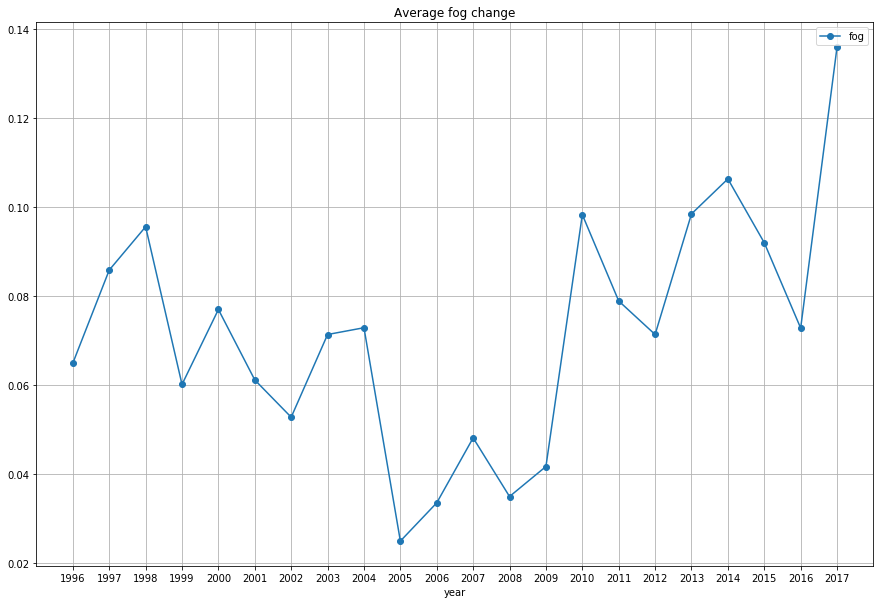

In [75]:
fog_mean_yearly = df.groupby("year").fog.mean().reset_index().sort_values('year', ascending=True)
fog_mean_yearly.year = fog_mean_yearly.year.astype("int")
fog_mean_yearly.plot(kind="line", x="year", y="fog", figsize=(15, 10),marker="o")
plt.grid(True)
plt.xlim([1995,2018])
plt.xticks(fog_mean_yearly.year)
plt.title("Average fog change")
plt.plot()

In [19]:
df.isnull().sum()

datetime_utc         0
conds               72
dewptm             621
fog                  0
hail                 0
heatindexm       71835
hum                757
precipm         100990
pressurem          232
rain                 0
snow                 0
tempm              673
thunder              0
tornado              0
vism              4428
wdird            14755
wdire            14755
wgustm           99918
windchillm      100411
wspdm             2358
year                 0
month                0
dtype: int64

In [20]:
df = df.drop(['heatindexm','precipm','wgustm','windchillm'],axis=1);

In [21]:
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem',
       'rain', 'snow', 'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wdire',
       'wspdm', 'year', 'month'],
      dtype='object')

In [22]:
df.isnull().sum()

datetime_utc        0
conds              72
dewptm            621
fog                 0
hail                0
hum               757
pressurem         232
rain                0
snow                0
tempm             673
thunder             0
tornado             0
vism             4428
wdird           14755
wdire           14755
wspdm            2358
year                0
month               0
dtype: int64

In [23]:
for i,row in df[df.dewptm.isnull()].iterrows():
    year_mean = df[df.year == row.year].dewptm.median()
    df.at[i,"dewptm"] = year_mean

In [24]:
for i,row in df[df.hum.isnull()].iterrows():
    year_mean = df[df.year == row.year].hum.median()
    df.at[i,"hum"] = year_mean

In [25]:
df.pressurem[df.pressurem < 0].count()

751

In [26]:
df.pressurem[df.pressurem < 0] = None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df.pressurem.isna().sum()

983

In [28]:
for i,row in df[df.pressurem.isnull()].iterrows():
    year_mean = df[df.year == row.year].pressurem.median()
    df.at[i,"pressurem"] = year_mean

In [29]:
for i,row in df[df.tempm.isnull()].iterrows():
    year_mean = df[df.year == row.year].tempm.median()
    df.at[i,"tempm"] = year_mean

In [30]:
for i,row in df[df.vism.isnull()].iterrows():
    year_mean = df[df.year == row.year].vism.median()
    df.at[i,"vism"] = year_mean

In [31]:
for i,row in df[df.wdird.isnull()].iterrows():
    year_mean = df[df.year == row.year].wdird.median()
    df.at[i,"wdird"] = year_mean

In [32]:
for i,row in df[df.wspdm.isnull()].iterrows():
    year_mean = df[df.year == row.year].wspdm.median()
    df.at[i,"wspdm"] = year_mean

In [33]:
df.isna().sum()

datetime_utc        0
conds              72
dewptm              0
fog                 0
hail                0
hum                 0
pressurem           0
rain                0
snow                0
tempm               0
thunder             0
tornado             0
vism                0
wdird               0
wdire           14755
wspdm               0
year                0
month               0
dtype: int64

In [34]:
for i,row in df[df.wdire.isnull()].iterrows():
    year_frequent = df[df.year == row.year].wdire.value_counts().idxmax()
    df.at[i,"wdire"] = year_frequent

In [35]:
df = df.dropna()
df.shape

(100918, 18)

In [36]:
df.isna().sum()

datetime_utc    0
conds           0
dewptm          0
fog             0
hail            0
hum             0
pressurem       0
rain            0
snow            0
tempm           0
thunder         0
tornado         0
vism            0
wdird           0
wdire           0
wspdm           0
year            0
month           0
dtype: int64

In [37]:
dummies_wdire = pd.get_dummies(df.wdire)
df = pd.concat([df,dummies_wdire],axis=1)
df.shape

(100918, 35)

In [38]:
df.drop("wdire",axis=1,inplace=True)
df.shape

(100918, 34)

In [39]:
df.drop("datetime_utc",axis=1,inplace=True)
df.shape

(100918, 33)

In [40]:
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,...,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West
0,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,...,0,0,0,0,0,0,0,0,0,1
1,Smoke,10.0,0,0,32.0,1017.0,0,0,28.0,0,...,1,0,0,0,0,0,0,0,0,0
2,Smoke,11.0,0,0,44.0,1017.0,0,0,24.0,0,...,1,0,0,0,0,0,0,0,0,0
3,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,...,1,0,0,0,0,0,0,0,0,0
4,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
df.to_csv(save_file,index = False)

In [42]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'year',
       'month', 'ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE',
       'SSE', 'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West'],
      dtype='object')